## 机器学习

线性回归
逻辑回归
SVM
RF


项目的目的是预测房价，需要从众多可能的影响因子中挑选出最能预测房价的因子来建立模型，用于预测房价。

分析步骤：
1.  理解项目目的，再围绕目的进行分析。本项目的目的根据数据预测房价；

2. 了解数据的分布特征，根据实际项目理解每列数据的意义。在数据分析时，最重要的是要熟悉业务，在业务基础上再分析，事半功倍；

3. 挑选特征。刻画每个特征与目标变量之间的关系，找出最重要的特征；同时，为了避免多重共线性，需剔除掉一个特征与特征之间相关性非常大的特征；

4. 应用交叉验证，对训练集进行建立合适的模型，再在测试集上测试；

5. 最终建立预测房价的模型。

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
#matplotlib inline

## 初试牛刀

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [4]:
x = np.array([[1,1],[1,2],[2,2],[2,3]])
#y=1*x_0 +2*x_1 +3

In [5]:
y= np.dot(x,np.array([1,2]))+3

In [6]:
#开始训练
reg = LinearRegression().fit(x,y)

In [7]:
#模型得分
reg.score(x,y)

1.0

In [8]:
#模型系数 w
reg.coef_

array([1., 2.])

In [13]:
#模型截距 b
reg.intercept_

3.0000000000000018

In [10]:
#模型预测，
reg.predict(np.array([[3,5]]))

array([16.])

## 尝试复杂数据模型

In [5]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
diabetes

{'DESCR': 'Diabetes dataset\n================\n\nNotes\n-----\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\nData Set Characteristics:\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attributes:\n    :Age:\n    :Sex:\n    :Body mass index:\n    :Average blood pressure:\n    :S1:\n    :S2:\n    :S3:\n    :S4:\n    :S5:\n    :S6:\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttp://www4.stat.ncsu.edu/~boos/var.select/diabetes.html\n\nFor more information see:\nB

In [6]:
np.shape(diabetes.data)

(442, 10)

In [7]:
np.shape(diabetes.target)

(442,)

In [12]:
?np.newaxis()
#np.newaxis() 就是增加维度，放哪里，就在那个地方增加一个维度，  后面的0 是列，取第一列

In [9]:
# Use only one feature ???

diabetes_X = diabetes.data[:, np.newaxis,0]
diabetes_X

array([[ 0.03807591],
       [-0.00188202],
       [ 0.08529891],
       [-0.08906294],
       [ 0.00538306],
       [-0.09269548],
       [-0.04547248],
       [ 0.06350368],
       [ 0.04170844],
       [-0.07090025],
       [-0.09632802],
       [ 0.02717829],
       [ 0.01628068],
       [ 0.00538306],
       [ 0.04534098],
       [-0.05273755],
       [-0.00551455],
       [ 0.07076875],
       [-0.0382074 ],
       [-0.02730979],
       [-0.04910502],
       [-0.0854304 ],
       [-0.0854304 ],
       [ 0.04534098],
       [-0.06363517],
       [-0.06726771],
       [-0.10722563],
       [-0.02367725],
       [ 0.05260606],
       [ 0.06713621],
       [-0.06000263],
       [-0.02367725],
       [ 0.03444337],
       [ 0.03081083],
       [ 0.01628068],
       [ 0.04897352],
       [ 0.01264814],
       [-0.00914709],
       [-0.00188202],
       [-0.00188202],
       [ 0.00538306],
       [-0.09996055],
       [-0.06000263],
       [ 0.01991321],
       [ 0.04534098],
       [ 0

In [13]:
np.shape(diabetes_X)

(442, 1)

In [14]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [15]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [17]:
# Create linear regression object
regr = linear_model.LinearRegression()
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# Train the model using the training sets
res = regr.fit(diabetes_X_train, diabetes_y_train)
res

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [26]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
#百度搜r2_score公式
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [306.72757499]
Mean squared error: 5472.26
Variance score: -0.13


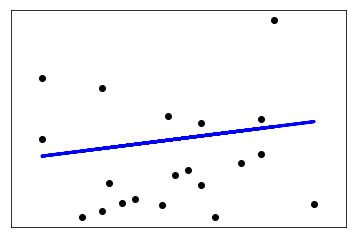

In [28]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
